<a href="https://colab.research.google.com/github/VijayPnr/Machine_Learning_Project-/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Failure Prediction Dataset**

In [ ]:
# Context

# Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. 
# Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. 
# Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.


# Attribute Information

#   1) Age: age of the patient [years]
#   2) Sex: sex of the patient [M: Male, F: Female]
#   3) ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
#   4) RestingBP: resting blood pressure [mm Hg]
#   5) Cholesterol: serum cholesterol [mm/dl]
#   6) FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
#   7) RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
#   8) MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
#   9) ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
#  10) Oldpeak: oldpeak = ST [Numeric value measured in depression]
#  11) ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
#  12) HeartDisease: output class [1: heart disease, 0: Normal]


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Machine Learning (Nov-Dec)/ML Project/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [ ]:
#Remove duplicates

data = data.drop_duplicates()

data.shape                                     

(918, 12)

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
#Corelation

corr_matrix = data.corr()['HeartDisease']
corr_matrix                                                     

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

In [ ]:
#Label Encoder

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

for i in data.columns:
  data[i] = le.fit_transform(data[i])

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [ ]:
#split x & y

x = data.iloc[:,:11]
y = data.iloc[:,-1]

In [ ]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
#split for training testing 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)

x_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,42,1,0,41,0,1,1,83,1,30,1
356,18,1,0,18,0,0,1,39,1,25,1
738,37,0,2,55,200,0,0,77,0,18,2
85,38,1,0,41,11,0,1,21,1,20,1
427,31,1,0,41,0,0,2,43,1,20,1


In [ ]:
y_train.head()

378    1
356    1
738    0
85     1
427    1
Name: HeartDisease, dtype: int64

In [ ]:
y_train.value_counts()

1    401
0    333
Name: HeartDisease, dtype: int64

In [ ]:
y_test.value_counts()

1    107
0     77
Name: HeartDisease, dtype: int64

In [ ]:
#SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE()

x_res,y_res = sm.fit_resample(x_train,y_train)

In [ ]:
y_res.value_counts()

1    401
0    401
Name: HeartDisease, dtype: int64

In [ ]:
#Standardisation

from sklearn.preprocessing import StandardScaler

sd = StandardScaler()                                                                                                                   
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

#KNN

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#Model Prediction

y_pred1 = model.predict(x_test)
y_pred1

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
y_test

306    1
711    0
298    1
466    1
253    0
      ..
909    1
293    1
761    1
2      0
409    1
Name: HeartDisease, Length: 184, dtype: int64

In [ ]:
#Model evaluation

     #accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

score = accuracy_score(y_test,y_pred1)
score

0.8532608695652174

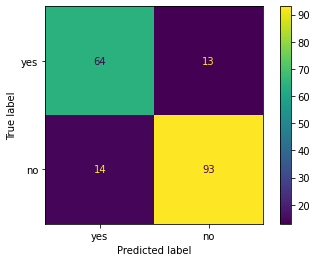

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ['yes','no']
cm = confusion_matrix(y_test,y_pred1)
cmd = ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [ ]:
#All scores

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        77
           1       0.88      0.87      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



***

#Naive Bayers

In [ ]:
#Naive Bayers (GaussianNB)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

y_pred2 = nb.predict(x_test)
y_pred2

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
y_test

306    1
711    0
298    1
466    1
253    0
      ..
909    1
293    1
761    1
2      0
409    1
Name: HeartDisease, Length: 184, dtype: int64

In [ ]:
#Accuracy score

from sklearn import metrics
metrics.accuracy_score(y_test,y_pred2)

0.8369565217391305

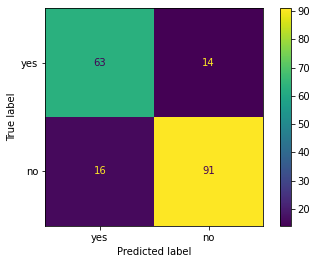

In [ ]:
#Confussion matrix

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
labels = ['yes','no']
conf_met2 = confusion_matrix(y_test,y_pred2)
cm_disp2 = ConfusionMatrixDisplay(conf_met2,display_labels=labels)
cm_disp2.plot()

In [ ]:
#All scores

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        77
           1       0.87      0.85      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



***

#SVM 

In [ ]:
#SVM training model

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train,)

y_pred3 = svc.predict(x_test)
y_pred3

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
y_test

306    1
711    0
298    1
466    1
253    0
      ..
909    1
293    1
761    1
2      0
409    1
Name: HeartDisease, Length: 184, dtype: int64

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred3)
score

0.8641304347826086

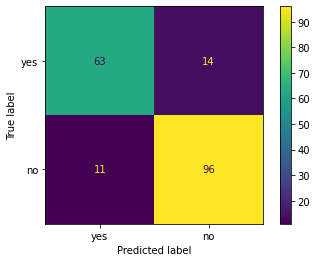

In [ ]:
#Confusion matrix

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

labels = ['yes','no']
cm3 = confusion_matrix(y_test,y_pred3)
cmd3 = ConfusionMatrixDisplay(cm3,display_labels=labels)
cmd3.plot()

In [ ]:
#All scores

from sklearn.metrics import accuracy_score

score3 = accuracy_score(y_test,y_pred3)
print('accuracy_score =',accuracy_score(y_test,y_pred3))

print(classification_report(y_test,y_pred3))

accuracy_score = 0.8641304347826086
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        77
           1       0.87      0.90      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [ ]:
#Training score

training_score = svc.score(x_train,y_train)
training_score

0.9059945504087193

In [ ]:
#Testing score

testing_score = svc.score(x_test,y_test)
testing_score

0.8641304347826086

***

#Decision Tree

In [ ]:
#Decision Tree

from sklearn import tree

data = tree.DecisionTreeClassifier()
data.fit(x_train,y_train)

y_pred4 = data.predict(x_test)
y_pred4

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
y_test

306    1
711    0
298    1
466    1
253    0
      ..
909    1
293    1
761    1
2      0
409    1
Name: HeartDisease, Length: 184, dtype: int64

In [ ]:
# Accuracy score

from sklearn.metrics import accuracy_score

score4 = accuracy_score(y_test,y_pred4)
score4

0.75

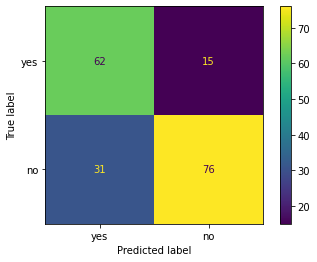

In [ ]:
#Confusion matrix (4)

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

labels = ['yes','no']
ConfusionMatrixDisplay.from_predictions(y_test,y_pred4,display_labels=labels)


In [ ]:
#All scores

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73        77
           1       0.84      0.71      0.77       107

    accuracy                           0.75       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.75      0.75       184



[Text(0.5757267441860465, 0.9705882352941176, 'ST_Slope <= 0.225\ngini = 0.496\nsamples = 734\nvalue = [333, 401]\nclass = 1'),
 Text(0.3200581395348837, 0.9117647058823529, 'MaxHR <= 0.564\ngini = 0.283\nsamples = 416\nvalue = [71, 345]\nclass = 1'),
 Text(0.17383720930232557, 0.8529411764705882, 'Sex <= -0.708\ngini = 0.199\nsamples = 348\nvalue = [39, 309]\nclass = 1'),
 Text(0.09767441860465116, 0.7941176470588235, 'Age <= 1.271\ngini = 0.459\nsamples = 42\nvalue = [15, 27]\nclass = 1'),
 Text(0.08837209302325581, 0.7352941176470589, 'RestingBP <= -0.005\ngini = 0.411\nsamples = 38\nvalue = [11, 27]\nclass = 1'),
 Text(0.046511627906976744, 0.6764705882352942, 'FastingBS <= 0.683\ngini = 0.5\nsamples = 18\nvalue = [9, 9]\nclass = 0'),
 Text(0.037209302325581395, 0.6176470588235294, 'ExerciseAngina <= 0.183\ngini = 0.48\nsamples = 15\nvalue = [9, 6]\nclass = 0'),
 Text(0.018604651162790697, 0.5588235294117647, 'MaxHR <= -1.528\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = 0'),

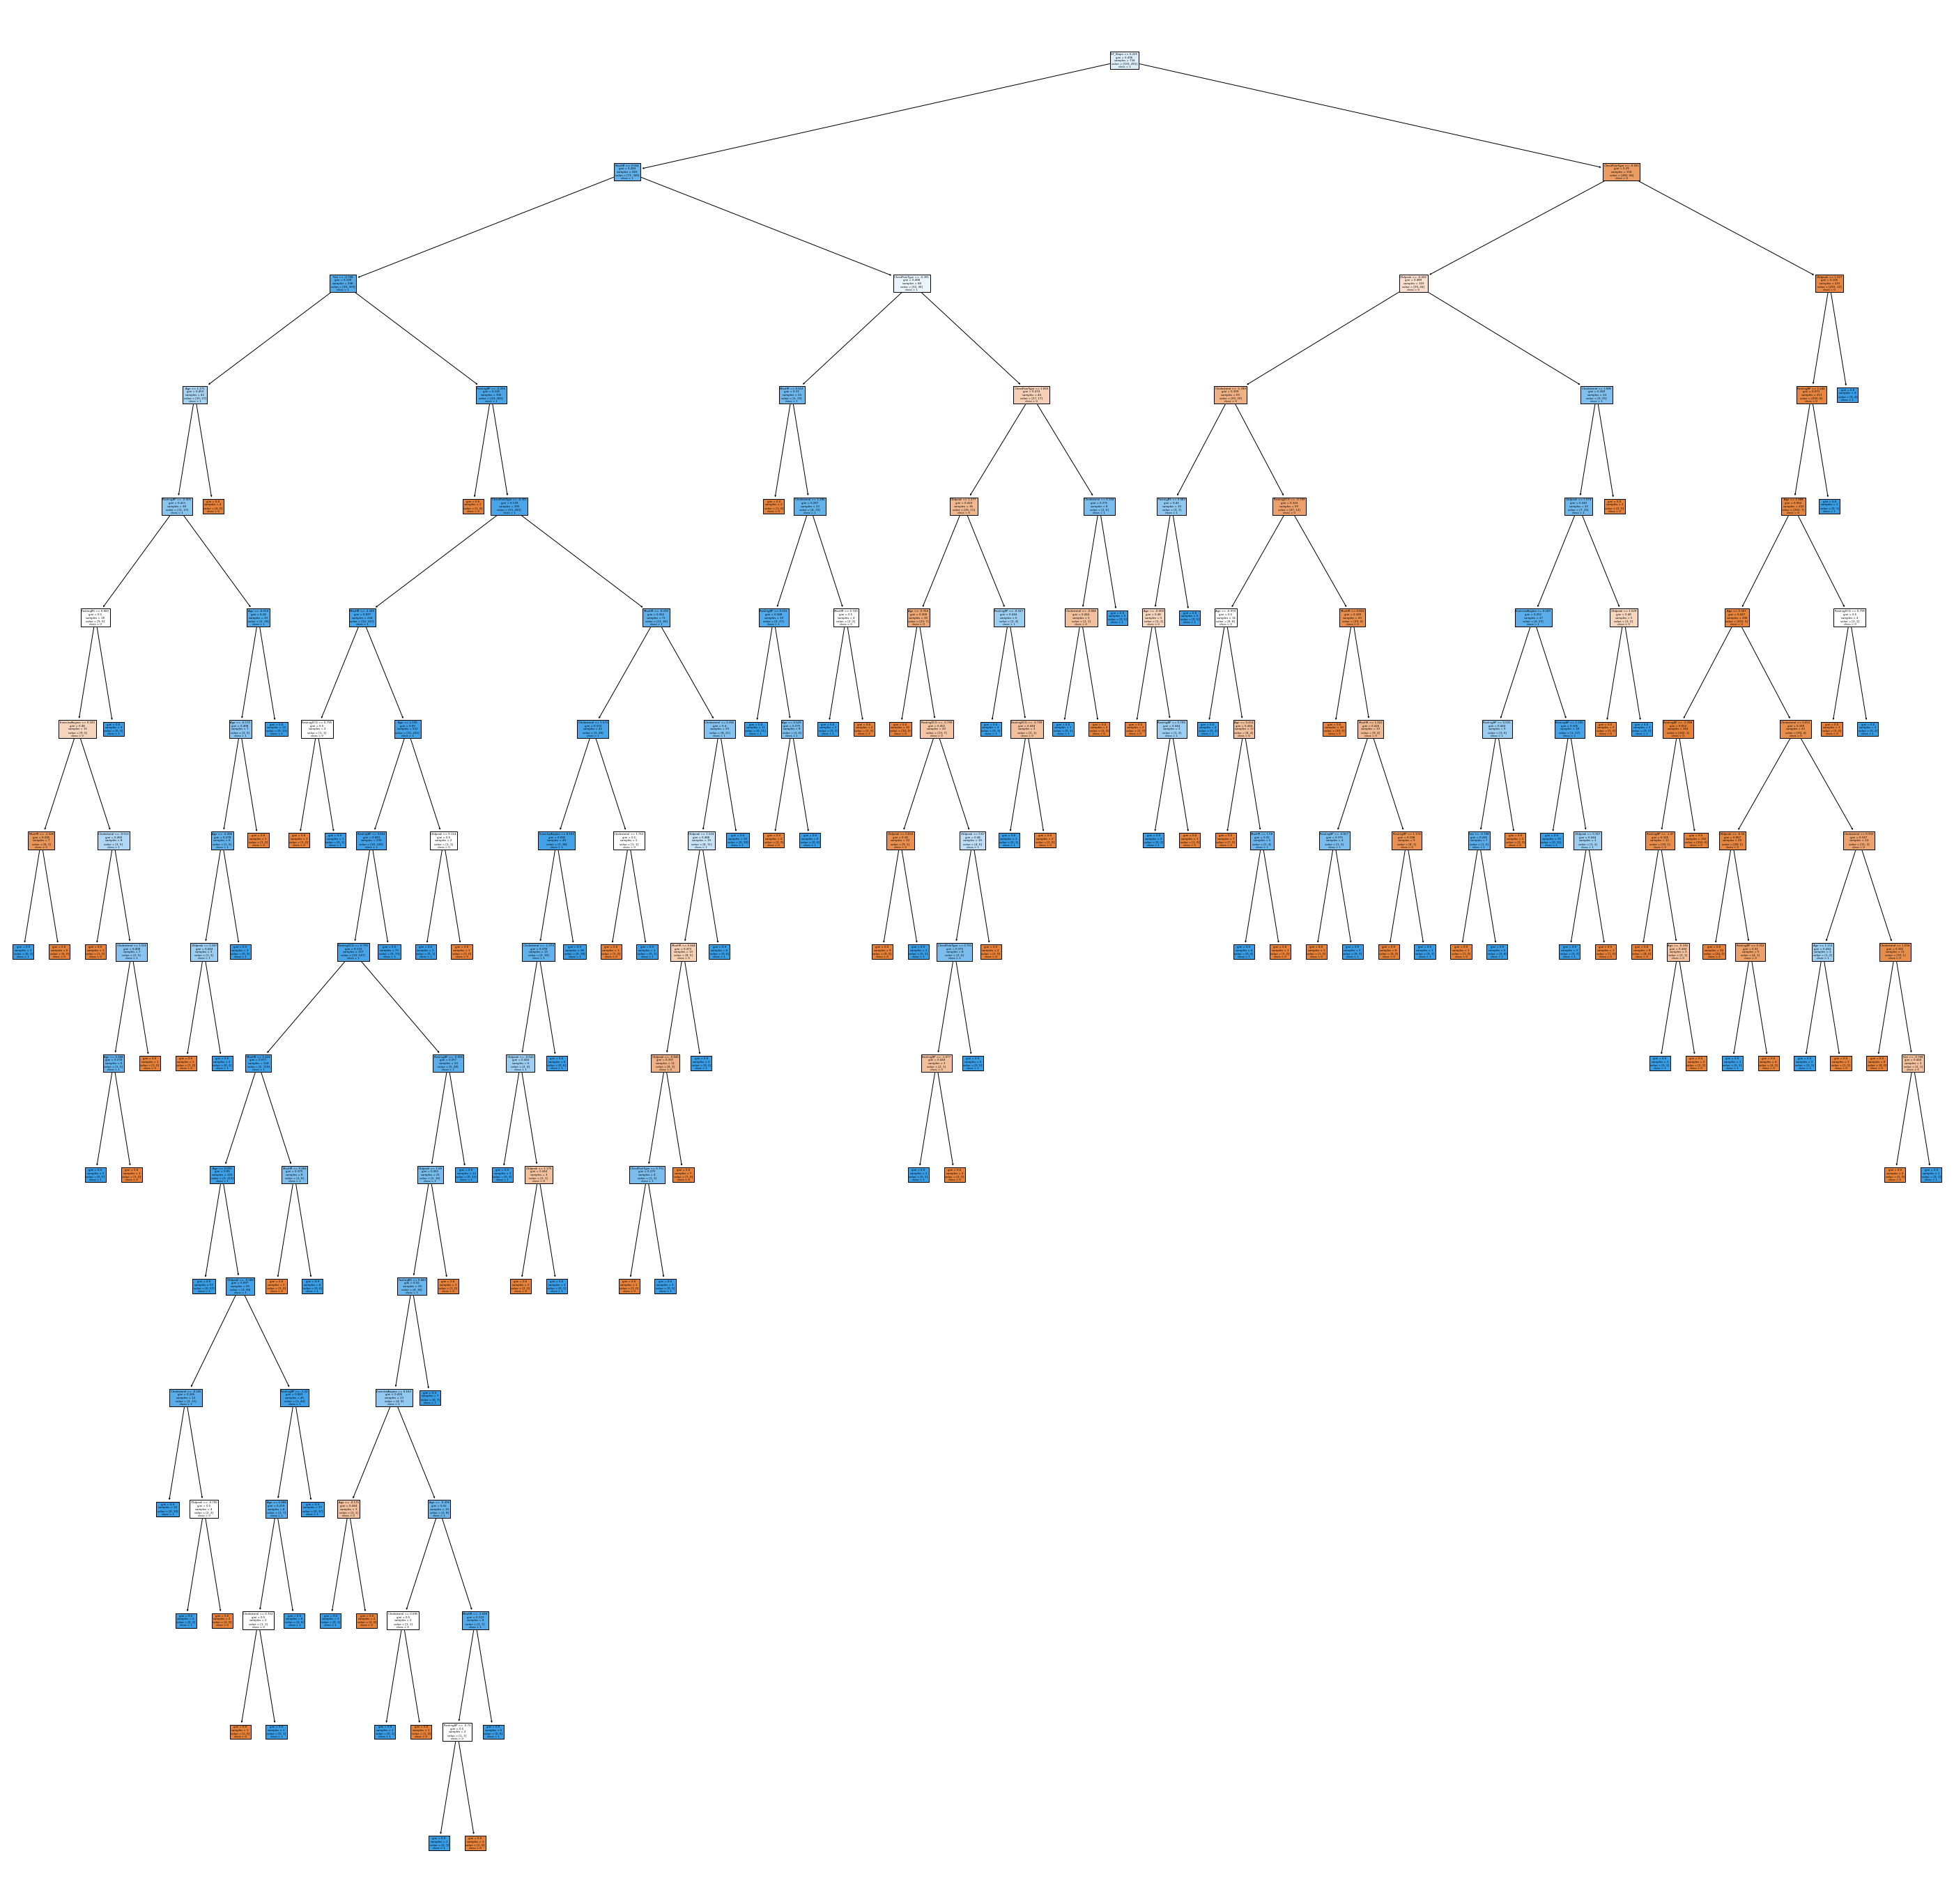

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))
tree.plot_tree(data,feature_names=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'],class_names=['0','1'],filled=True)

***

#Random forest

In [ ]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=5,max_features=5)
rfc.fit(x_train,y_train)
y_pred5 = rfc.predict(x_test)
y_pred5

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
#Training score

training_score = rfc.score(x_train,y_train)
training_score

0.9155313351498637

In [ ]:
#Testing score

testing_score = rfc.score(x_test,y_test)
testing_score

0.8152173913043478

In [ ]:
# Accuracy score

from sklearn.metrics import accuracy_score

score5 = accuracy_score(y_test,y_pred5)
score5

0.8152173913043478

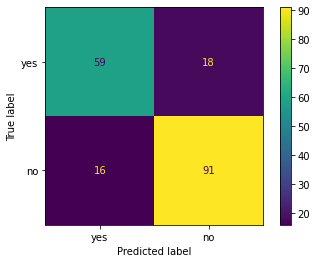

In [ ]:
#Confusion matrix   - (No.5)

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
labels = ['yes','no']
cm5 = confusion_matrix(y_test,y_pred5)
cmd5 = ConfusionMatrixDisplay(cm5,display_labels=labels)
cmd5.plot()

In [ ]:
#All scores

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        77
           1       0.83      0.85      0.84       107

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.82      0.81       184



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


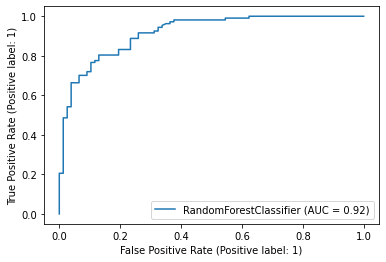

In [ ]:
#ROC curve

from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc,x_test,y_test)

In [ ]:
#AUC Curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred5)

0.8083505279766963

***

#Adaboost

In [ ]:
 #Adaboost

import sklearn.ensemble as ensm                                                           
adb = ensm.AdaBoostClassifier(base_estimator=None,n_estimators = 10,learning_rate = 1.0)

In [ ]:
#fit by model

adb.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [ ]:
#predicted ouput

y_pred6 = adb.predict(x_test)
y_pred6

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
#Training score & testing score

training_score = adb.score(x_train,y_train)
training_score

0.8773841961852861

In [ ]:
testing_score = adb.score(x_test,y_test)
testing_score

0.8315217391304348

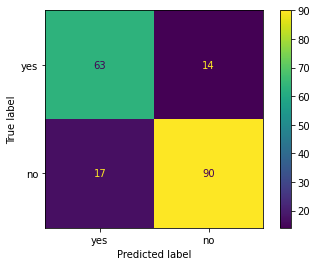

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
labels = ['yes','no']
cm6 = confusion_matrix(y_test,y_pred6)
cmd6 = ConfusionMatrixDisplay(cm6,display_labels=labels)
cmd6.plot()

In [ ]:
#All scores

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

score6 = accuracy_score(y_test,y_pred6)
print('accuracy_score =',accuracy_score(y_test,y_pred6))

print(classification_report(y_test,y_pred6))

accuracy_score = 0.8315217391304348
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        77
           1       0.87      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



***

#Logistic Regression

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred7 = model.predict(x_test)
y_pred7

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
#Training score

training_score = model.score(x_train,y_train)
training_score

0.8542234332425068

In [ ]:
#Testing score

testing_score = model.score(x_test,y_test)
testing_score

0.8315217391304348

In [ ]:
# Accuracy score

from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay

score7 = accuracy_score(y_test,y_pred7)
score7

0.8315217391304348

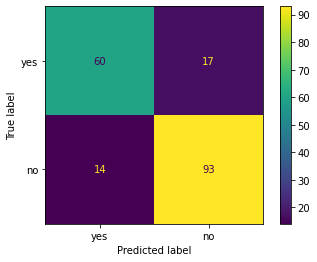

In [ ]:
#Confusion matrix   - (No.7)

labels = ['yes','no']
conf_mat7 = confusion_matrix(y_test,y_pred7)
cmd7 = ConfusionMatrixDisplay(conf_mat7,display_labels=labels)
cmd7.plot()

In [ ]:
#All scores

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        77
           1       0.85      0.87      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



***

***

In [ ]:
#                    Accuracy   Precsn    Recall    F1-score
 
#             KNN  -   0.85      0.88*     0.87      0.87
#     Naive Bayes  -   0.84      0.87      0.85      0.86
#             SVM  -   0.86*     0.87      0.90*     0.88*
#   Decision Tree  -   0.75      0.84      0.71      0.77
#   Random forest  -   0.82      0.83      0.85      0.84
#  Adaboost(Ensm)  -   0.83      0.87      0.84      0.85
#   Logistic Regg  -   0.83      0.85      0.87      0.86